## 載入所需套件

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from talib import RSI, BBANDS, MACD

## 從Yahoo finance下載股價資料，載入過去五年每日元大高股息ETF(0056)收盤資料

In [2]:
data = pd.read_csv(r'C:\Users\npc94\OneDrive\桌面\0056.TW.csv',index_col=0,parse_dates=True)

In [3]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

## 設定布林通道區間，上中下界

In [4]:
up, mid, low = BBANDS(data['Close'], timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

## 設定RSI指標的參數，以14天為時間區間

In [5]:
rsi = RSI(data['Close'], timeperiod=14)

## 設定MACD的指標

In [6]:
macd, macdsignal, macdhist = MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

## 將資料以及指標一併進行繪圖、MACD指標進行繪製比較

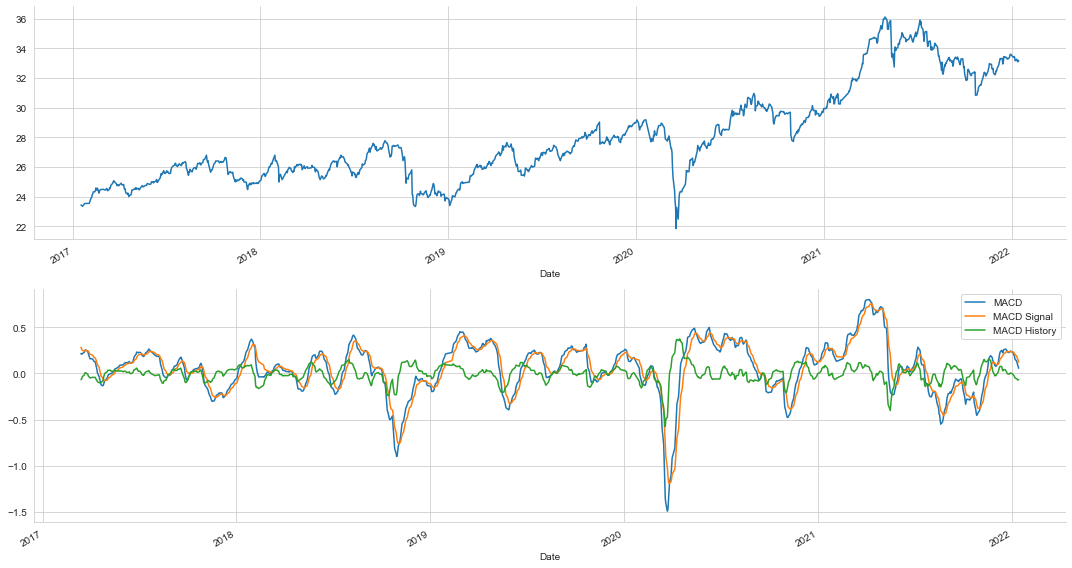

In [7]:
macd_data = pd.DataFrame({'0056': data['Close'], 'MACD': macd, 'MACD Signal': macdsignal, 'MACD History': macdhist})

fig, axes= plt.subplots(nrows=2, figsize=(15, 8))
macd_data['0056'].plot(ax=axes[0])
macd_data.drop('0056', axis=1).plot(ax=axes[1])
fig.tight_layout()
sns.despine();

In [8]:
data = pd.DataFrame({'3008': data['Close'], 'BB Up': up, 'BB Mid': mid, 'BB down': low, 'RSI': rsi, 'MACD': macd})

## 將資料以及指標一併進行繪圖，將布林通道、RSI指標和MACD一併進行繪製比較

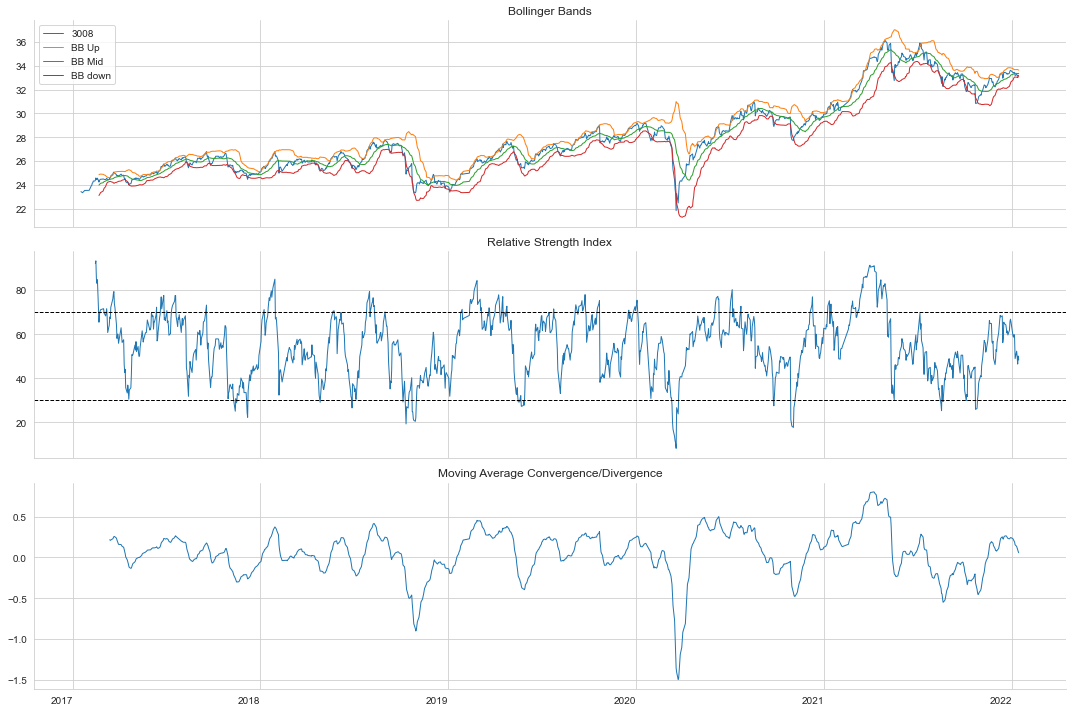

In [9]:
fig, axes= plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
data.drop(['RSI', 'MACD'], axis=1).plot(ax=axes[0], lw=1, title='Bollinger Bands')
data['RSI'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')
data.MACD.plot(ax=axes[2], lw=1, title='Moving Average Convergence/Divergence', rot=0)
axes[2].set_xlabel('')
fig.tight_layout()
sns.despine();